In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"limshengkang","key":"ccd307955db1914f8e0b80febc68967e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets download -d asdasdasasdas/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
  0% 0.00/82.0M [00:00<?, ?B/s]
100% 82.0M/82.0M [00:00<00:00, 1.25GB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("garbage-classification.zip", "r") as zip_ref:
    zip_ref.extractall("garbage_data")

In [ ]:
import os, shutil
import random

src_folder = "garbage_data/Garbage classification/Garbage classification"
dst_base = "recycle_data"

for split in ['train', 'val']:
    for cls in os.listdir(src_folder):
        os.makedirs(os.path.join(dst_base, split, cls), exist_ok=True)

for cls in os.listdir(src_folder):
    class_path = os.path.join(src_folder, cls)
    images = os.listdir(class_path)
    random.shuffle(images)
    split_point = int(0.8 * len(images))
    train_imgs = images[:split_point]
    val_imgs = images[split_point:]

    for split, split_imgs in [('train', train_imgs), ('val', val_imgs)]:
        for img in split_imgs:
            src = os.path.join(class_path, img)
            dst = os.path.join(dst_base, split, cls, img)
            if os.path.isfile(src):
                shutil.copy(src, dst)

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO("yolov8n-cls.pt")
model.train(data="recycle_data", epochs=10, imgsz=150)

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=recycle_data, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=150, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

100%|██████████| 5.35M/5.35M [00:00<00:00, 307MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[150] must be multiple of max stride 32, updating to [160]
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 773.5±234.3 MB/s, size: 16.7 KB)


train: Scanning /content/recycle_data/train... 2019 images, 0 corrupt: 100%|██████████| 2019/2019 [00:00<00:00, 5211.47it/s]

train: New cache created: /content/recycle_data/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 298.0±283.1 MB/s, size: 20.2 KB)


val: Scanning /content/recycle_data/val... 508 images, 0 corrupt: 100%|██████████| 508/508 [00:00<00:00, 3413.87it/s]

val: New cache created: /content/recycle_data/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/classify/train3
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10     0.193G      1.862         16        160:  13%|█▎        | 16/127 [00:02<00:11,  9.90it/s]

       1/10     0.193G      1.846         16        160:  22%|██▏       | 28/127 [00:03<00:10,  9.44it/s]
100%|██████████| 755k/755k [00:00<00:00, 70.0MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 11.44it/s]

                   all      0.691      0.992



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  5.09it/s]

                   all      0.813      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]

                   all      0.815          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00,  8.71it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 10.26it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 11.84it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 11.79it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 11.18it/s]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.271G     0.2676          3        160: 100%|██████████| 127/127 [00:12<00:00, 10.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 11.47it/s]

                   all      0.904          1



10 epochs completed in 0.041 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 3.0MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/recycle_data/train... found 2019 images in 6 classes ✅ 
val: /content/recycle_data/val... found 508 images in 6 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 10.58it/s]


                   all      0.904          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x790b32e3ae90>
curves: []
curves_results: []
fitness: 0.9517716467380524
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9035432934761047, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9517716467380524}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.03691946653536817, 'inference': 0.40256115944915977, 'loss': 0.00039645472427972297, 'postprocess': 0.0005749881893727548}
task: 'classify'
top1: 0.9035432934761047
top5: 1.0

In [ ]:
import os

for split in ['train', 'val']:
    path = f'recycle_data/{split}'
    print(f"\n📂 {split.upper()} contents:")
    if os.path.exists(path):
        for cls in os.listdir(path):
            cls_path = os.path.join(path, cls)
            if os.path.isdir(cls_path):
                print(f"  📁 {cls}: {len(os.listdir(cls_path))} images")
    else:
        print("Not found")


📂 TRAIN contents:
  📁 cardboard: 322 images
  📁 metal: 328 images
  📁 trash: 109 images
  📁 plastic: 385 images
  📁 glass: 400 images
  📁 paper: 475 images

📂 VAL contents:
  📁 cardboard: 81 images
  📁 metal: 82 images
  📁 trash: 28 images
  📁 plastic: 97 images
  📁 glass: 101 images
  📁 paper: 119 images


In [ ]:
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

results = model.predict(source=img_path)
print("Predicted class:", results[0].names[results[0].probs.top1])

Saving WhatsApp Image 2022-06-05 at 11.13.31 PM.jpeg to WhatsApp Image 2022-06-05 at 11.13.31 PM (1).jpeg
Predicted class: paper


In [ ]:
metrics = model.val(data="recycle_data", imgsz=160)

print(" Top-1 Accuracy:", metrics.top1)
print(" Top-5 Accuracy:", metrics.top5)

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/recycle_data/train... found 2019 images in 6 classes ✅ 
val: /content/recycle_data/val... found 508 images in 6 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 430.0±129.5 MB/s, size: 20.2 KB)


val: Scanning /content/recycle_data/val... 508 images, 0 corrupt: 100%|██████████| 508/508 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:02<00:00, 13.44it/s]


                   all      0.904          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val20
 Top-1 Accuracy: 0.9035432934761047
 Top-5 Accuracy: 1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# 获取验证集数据
val_dir = "recycle_data/val"
class_names = sorted(os.listdir(val_dir))
true_labels = []
pred_labels = []

for idx, cls in enumerate(class_names):
    cls_path = os.path.join(val_dir, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)

        results = model.predict(source=img_path, imgsz=160, verbose=False)
        pred_idx = results[0].probs.top1
        pred_labels.append(pred_idx)
        true_labels.append(idx)

# 混淆矩阵
cm = confusion_matrix(true_labels, pred_labels)

# 🎨 绘制混淆矩阵图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

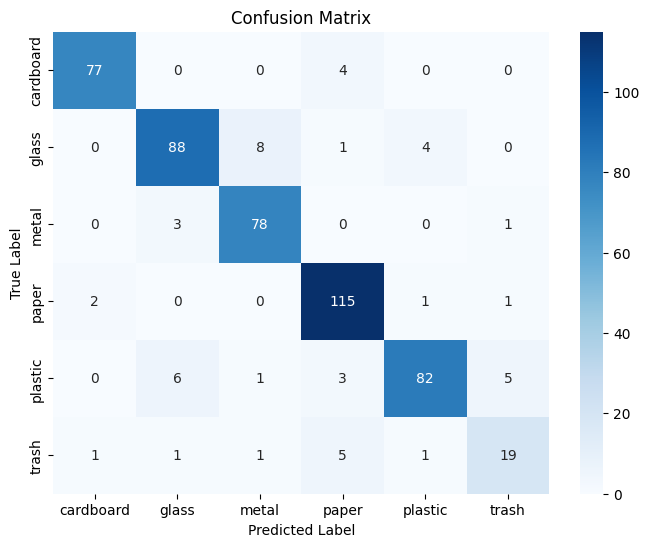

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# 获取验证集数据
val_dir = "recycle_data/val"
class_names = sorted(os.listdir(val_dir))
true_labels = []
pred_labels = []

for idx, cls in enumerate(class_names):
    cls_path = os.path.join(val_dir, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)

        results = model.predict(source=img_path, imgsz=160, verbose=False)
        pred_idx = results[0].probs.top1
        pred_labels.append(pred_idx)
        true_labels.append(idx)

# 混淆矩阵
cm = confusion_matrix(true_labels, pred_labels)

# 🎨 绘制混淆矩阵图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()




Saving 11.png to 11.png
Predicted class: paper
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
train: /content/recycle_data/train... found 2019 images in 6 classes ✅ 
val: /content/recycle_data/val... found 508 images in 6 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 886.4±443.8 MB/s, size: 20.2 KB)


val: Scanning /content/recycle_data/val... 508 images, 0 corrupt: 100%|██████████| 508/508 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:01<00:00, 16.99it/s]


                   all      0.904          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val19
 Top-1 Accuracy: 0.9035432934761047
 Top-5 Accuracy: 1.0


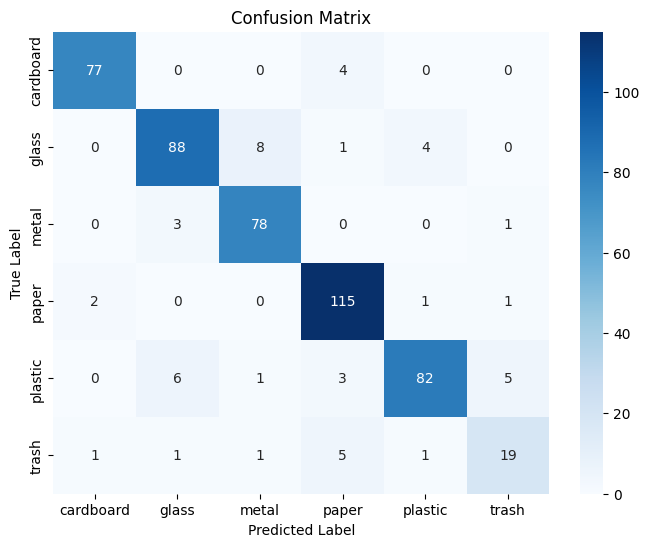

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# 获取验证集数据
val_dir = "recycle_data/val"
class_names = sorted(os.listdir(val_dir))
true_labels = []
pred_labels = []

for idx, cls in enumerate(class_names):
    cls_path = os.path.join(val_dir, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)

        results = model.predict(source=img_path, imgsz=160, verbose=False)
        pred_idx = results[0].probs.top1
        pred_labels.append(pred_idx)
        true_labels.append(idx)

# 混淆矩阵
cm = confusion_matrix(true_labels, pred_labels)

# 🎨 绘制混淆矩阵图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
